# Deep Learning: Keras

## Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import save_model, load_model

## Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

## Exibição dos dados

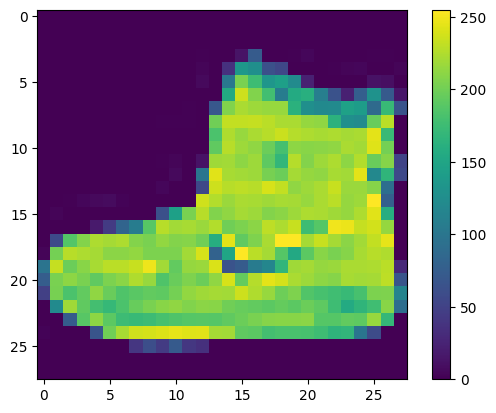

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

## Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

## Criando, compilando, treinando e normalizando o modelo

In [14]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5254 - accuracy: 0.8132 - val_loss: 0.4093 - val_accuracy: 0.8513
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3960 - accuracy: 0.8551 - val_loss: 0.3764 - val_accuracy: 0.8622
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3605 - accuracy: 0.8664 - val_loss: 0.3447 - val_accuracy: 0.8760
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3397 - accuracy: 0.8750 - val_loss: 0.3417 - val_accuracy: 0.8762
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3225 - accuracy: 0.8808 - val_loss: 0.3342 - val_accuracy: 0.8788


## Sumário do modelo

In [26]:
sumario_modelo = modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Pesos da primeira camada Dense

In [28]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[-0.06340566,  0.04746006,  0.04309499, ..., -0.12182225,
          0.11036837,  0.02781457],
        [ 0.02917527,  0.04236064,  0.02910014, ...,  0.12917712,
          0.05350007,  0.04126622],
        [ 0.03570891, -0.03808083, -0.02598292, ...,  0.18181983,
          0.00124685, -0.05097239],
        ...,
        [ 0.21897726,  0.02193146, -0.03970423, ...,  0.16726263,
         -0.00761285,  0.02511639],
        [ 0.10028174, -0.01647204,  0.05670565, ...,  0.02852418,
          0.11543278,  0.01805919],
        [-0.12193654,  0.01209844,  0.02802214, ..., -0.01920744,
          0.01871732, -0.10042378]], dtype=float32),
 array([ 0.1846641 ,  0.28038973, -0.25063732, -0.15316111, -0.15416048,
         0.1205644 ,  0.12205381,  0.15521714, -0.01664684, -0.0219768 ,
        -0.03698837,  0.39373282, -0.13634488, -0.11396961, -0.02527466,
         0.22673193,  0.33571643, -0.03384047, -0.21675278,  0.05479505,
        -0.11926373,  0.28805736, -0.03144001,  0.02499641,  0.185

## Salvando e carregando o modelo treinado

In [16]:
save_model(modelo, 'modelo.keras')

modelo_salvo = load_model('modelo.keras')

## Visualizando as acurácias de treino e validação por época

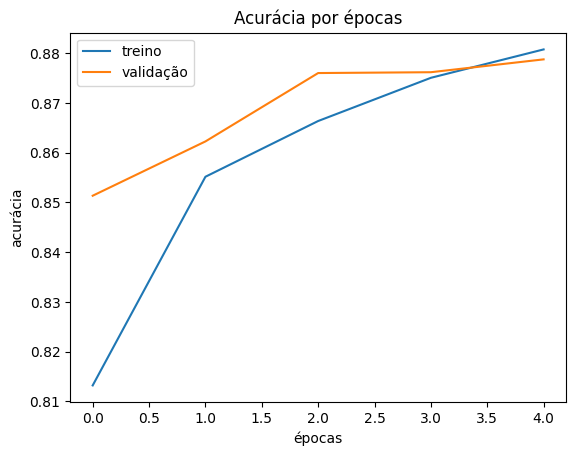

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

## Visualizando as perdas de treino e validação por época

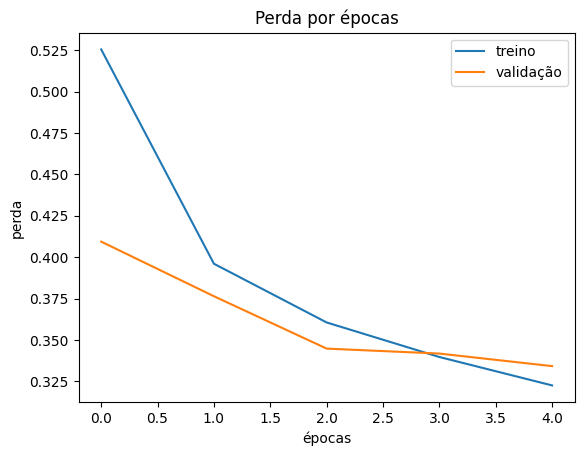

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

## Testando o modelo e o modelo salva

In [10]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


## Avaliando o modelo

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 60.6085 - accuracy: 0.8506
Perda do teste: 60.60853576660156
Acurácia do teste: 0.850600004196167
